In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
web = pd.read_csv('Desktop\data.csv')
web['id'] = range (0,len(web['price']))
web.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,id
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,3
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,4


In [3]:
web.shape

(4600, 19)

In [4]:
web.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,id
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2299.500000
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,1328.049949
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1149.750000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2299.500000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,3449.250000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,4599.000000


In [5]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
id               4600 non-null int32
dtypes: float64(4), int32(1), int64(9), object(5)
memory usage: 665.0+ KB


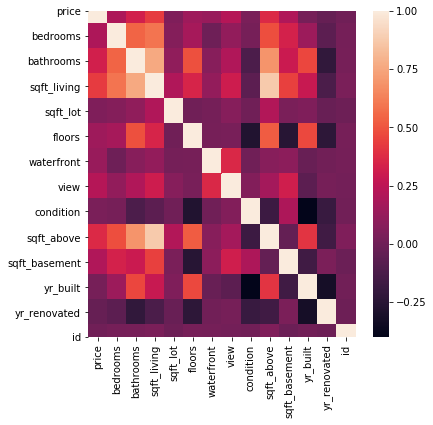

In [6]:
plt.figure(figsize =(6,6))
sns.heatmap(web.corr())
plt.show()

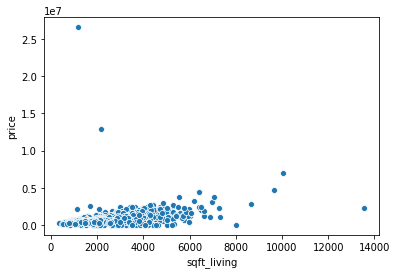

In [7]:
sns.scatterplot(x='sqft_living', y='price', data=web)
plt.show()

In [8]:
web.index

RangeIndex(start=0, stop=4600, step=1)

In [9]:
web.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'id'],
      dtype='object')

In [10]:
X = web[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
y = web[['price']]

In [11]:
X.shape,y.shape

((4600, 12), (4600, 1))

In [12]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=7)

In [13]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((3220, 12), (1380, 12), (3220, 1), (1380, 1))

In [14]:
mode = LinearRegression()

In [15]:
mode.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
prediction = mode.predict(X_test)
prediction

array([[337903.80479923],
       [756453.21296631],
       [241896.79339481],
       ...,
       [386535.39172783],
       [571556.6290658 ],
       [432310.04709854]])

In [17]:
prediction[1]

array([756453.21296631])

In [18]:
prediction[2]

array([241896.79339481])

In [19]:
a1 = web[web['id']==1]
a1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,id
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1


In [20]:
a1['price']

1    2384000.0
Name: price, dtype: float64

In [21]:
mode.coef_

array([[-6.19572759e+04,  3.57625958e+04,  1.76450336e+02,
        -7.38882183e-01,  5.75560439e+04,  4.39942436e+05,
         4.06754585e+04,  2.90103431e+04,  1.06783639e+02,
         6.96666975e+01, -2.55613976e+03,  1.43930713e+01]])

In [22]:
mode.intercept_

array([4925229.10543576])

In [23]:
prediction.size

1380

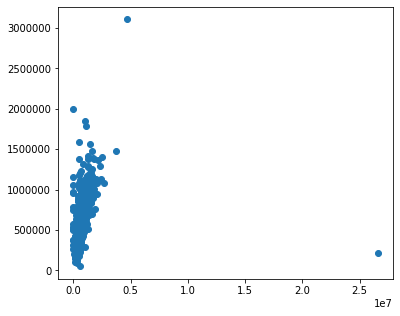

In [24]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, prediction)
plt.show()

ROOT MEAN SQUARED ERROR

In [25]:
Err = metrics.mean_squared_error(y_test, prediction)
Err

564044260921.3169

In [26]:
sap = np.sqrt(Err)
sap

751028.8016589755

In [27]:
X = web[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
y = web[['price']]

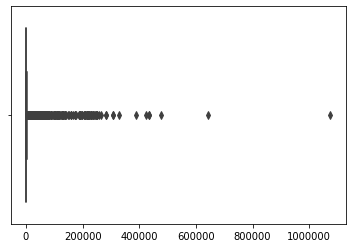

In [28]:
sns.boxplot(X)
plt.show()

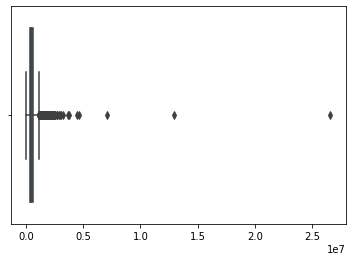

In [29]:
sns.boxplot(y)
plt.show()

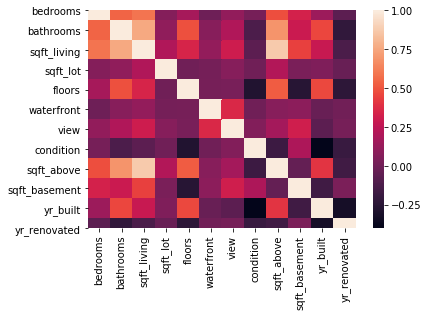

In [30]:
sns.heatmap(X.corr())
plt.show()

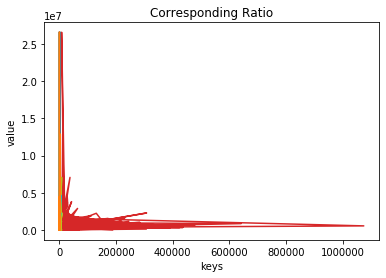

In [31]:
plt.plot(X,y,)
plt.xlabel('keys')
plt.ylabel('value')
plt.title('Corresponding Ratio')
plt.show()